In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

Task 1 - Exploration

In [69]:
#Selecting data base
sales_train_df = pd.read_csv('/content/drive/MyDrive/Vendas/train.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.



In [70]:
sales_train_df.shape

(1017209, 9)

In [71]:
sales_train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [72]:
#Verifying unique values
sales_train_df['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6])

In [73]:
sales_train_df['Open'].unique()

array([1, 0])

In [74]:
sales_train_df['Promo'].unique()

array([1, 0])

In [75]:
sales_train_df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [76]:
sales_train_df['SchoolHoliday'].unique()

array([1, 0])

In [77]:
#Generating statistics about this data base
sales_train_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [78]:
sales_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [79]:
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [80]:
#Importing data base with info of stores
store_info_df = pd.read_csv('/content/drive/MyDrive/Vendas/store.csv')

In [81]:
store_info_df.shape

(1115, 10)

In [82]:
#Generating statistics about this data base
store_info_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [83]:
store_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [84]:
store_info_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


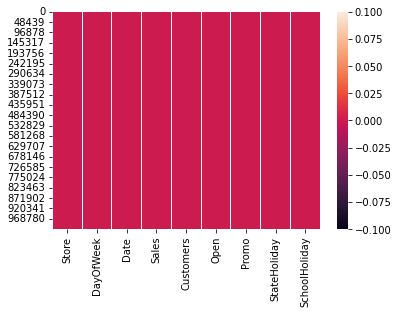

In [85]:
#Verifying if exist null values
sns.heatmap(sales_train_df.isnull())

In [86]:
sales_train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

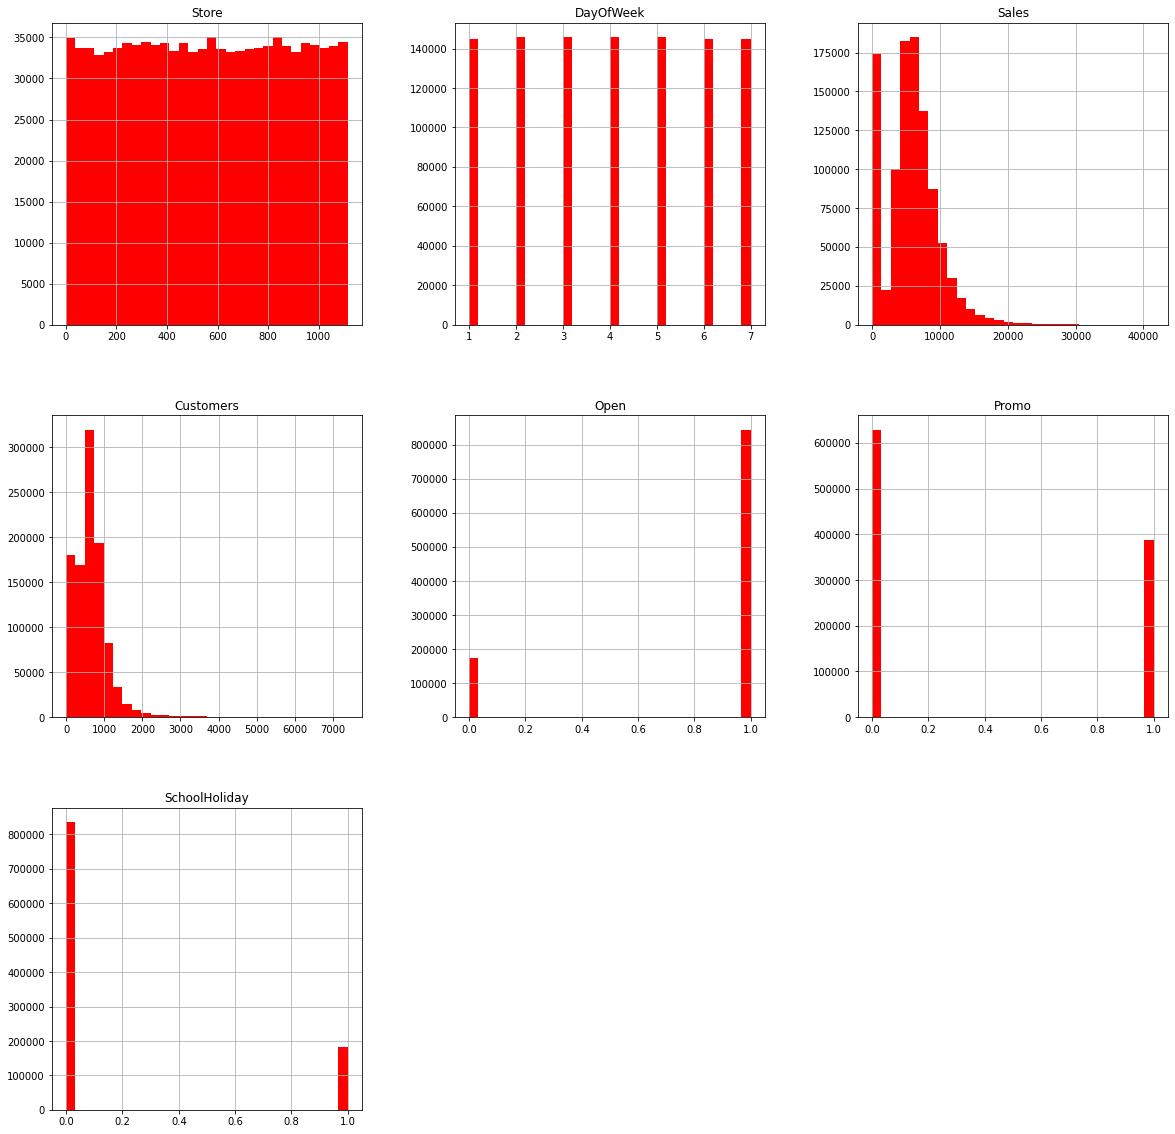

In [87]:
#Data visualization
sales_train_df.hist(bins = 30, figsize=(20, 20), color = 'r');

In [88]:
#Max customers in one day
sales_train_df['Customers'].max()

7388

In [89]:
#Splitting the 'Open' column in two variables
closed_train_df = sales_train_df[sales_train_df['Open'] == 0]
open_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [129]:
print('Total = ', len(sales_train_df))
print('Number of stores/days closed = ', len(closed_train_df))
print('Number of stores/days open = ', len(open_train_df))

Total =  844392
Number of stores/days closed =  172817
Number of stores/days open =  844392


In [91]:
#Days closed
172817 / len(store_info_df)

154.99282511210762

In [130]:
#Days open
884392 / len(store_info_df)

793.1766816143498

In [92]:
#Creating new variable with only values 'Open' = 1
sales_train_df = sales_train_df[sales_train_df['Open'] == 1]

In [93]:
#Delete 'Open' column, because always Open = 1
sales_train_df.drop(['Open'], axis=1, inplace=True)

In [94]:
sales_train_df.shape

(844392, 8)

In [95]:
#Generating statistics about this data base
sales_train_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


Task 2 - Treating null values

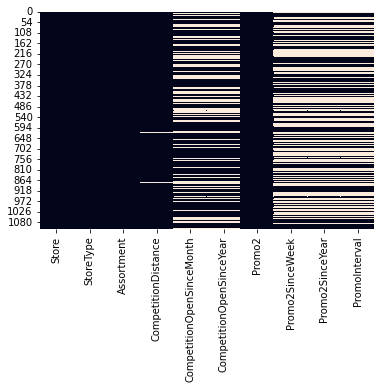

In [96]:
#Visualization the columns with null values
sns.heatmap(store_info_df.isnull(), cbar=False);

In [97]:
store_info_df[store_info_df['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [98]:
store_info_df[store_info_df['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [99]:
store_info_df[store_info_df['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [100]:
store_info_df[store_info_df['Promo2SinceWeek'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [101]:
store_info_df[store_info_df['Promo2SinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [102]:
store_info_df[store_info_df['PromoInterval'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


In [103]:
#Fill the NaN with 0
str_cols = ['Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth']
for str in str_cols:
  store_info_df[str].fillna(0, inplace=True)

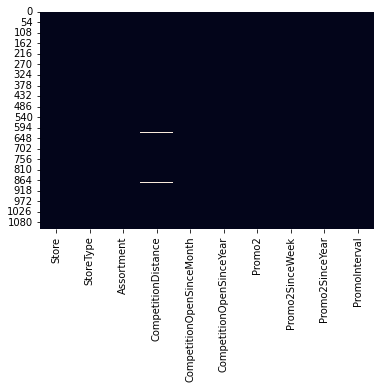

In [104]:
sns.heatmap(store_info_df.isnull(), cbar=False)

In [105]:
#Fill the null values with mean
store_info_df['CompetitionDistance'].fillna(store_info_df['CompetitionDistance'].mean(), inplace=True)

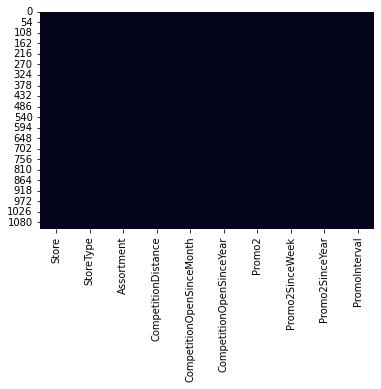

In [106]:
sns.heatmap(store_info_df.isnull(), cbar=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd439557fd0>,
      dtype=object)

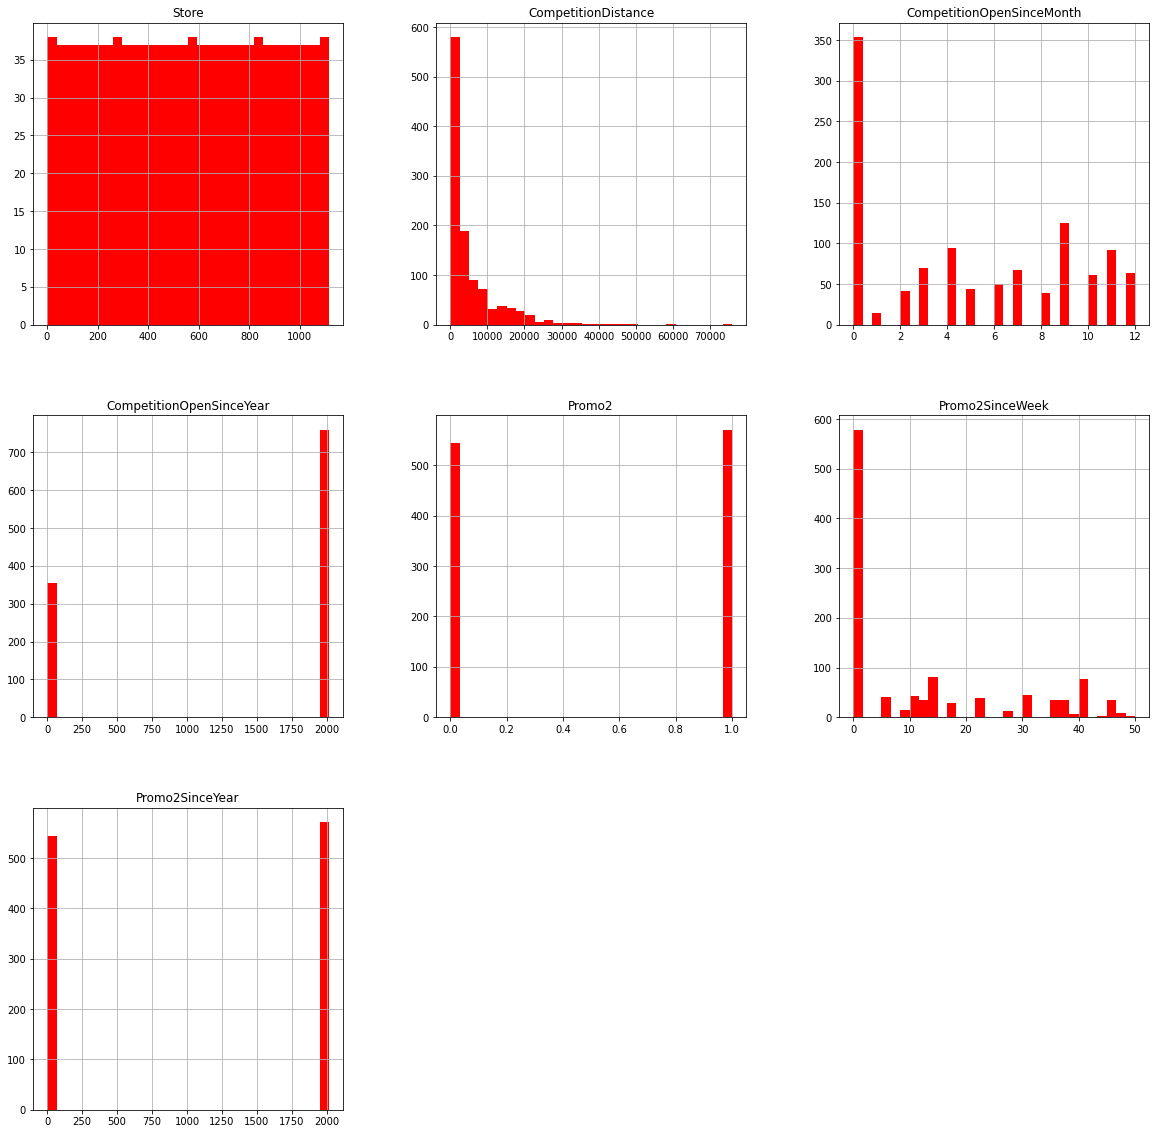

In [107]:
store_info_df.hist(bins=30, figsize=(20,20), color='r');

Task 3 -  Correlations


In [108]:
#Inner join with pandas
sales_train_all_df = pd.merge(sales_train_df, store_info_df, how='inner', on='Store')

In [109]:
sales_train_all_df.shape

(844392, 17)

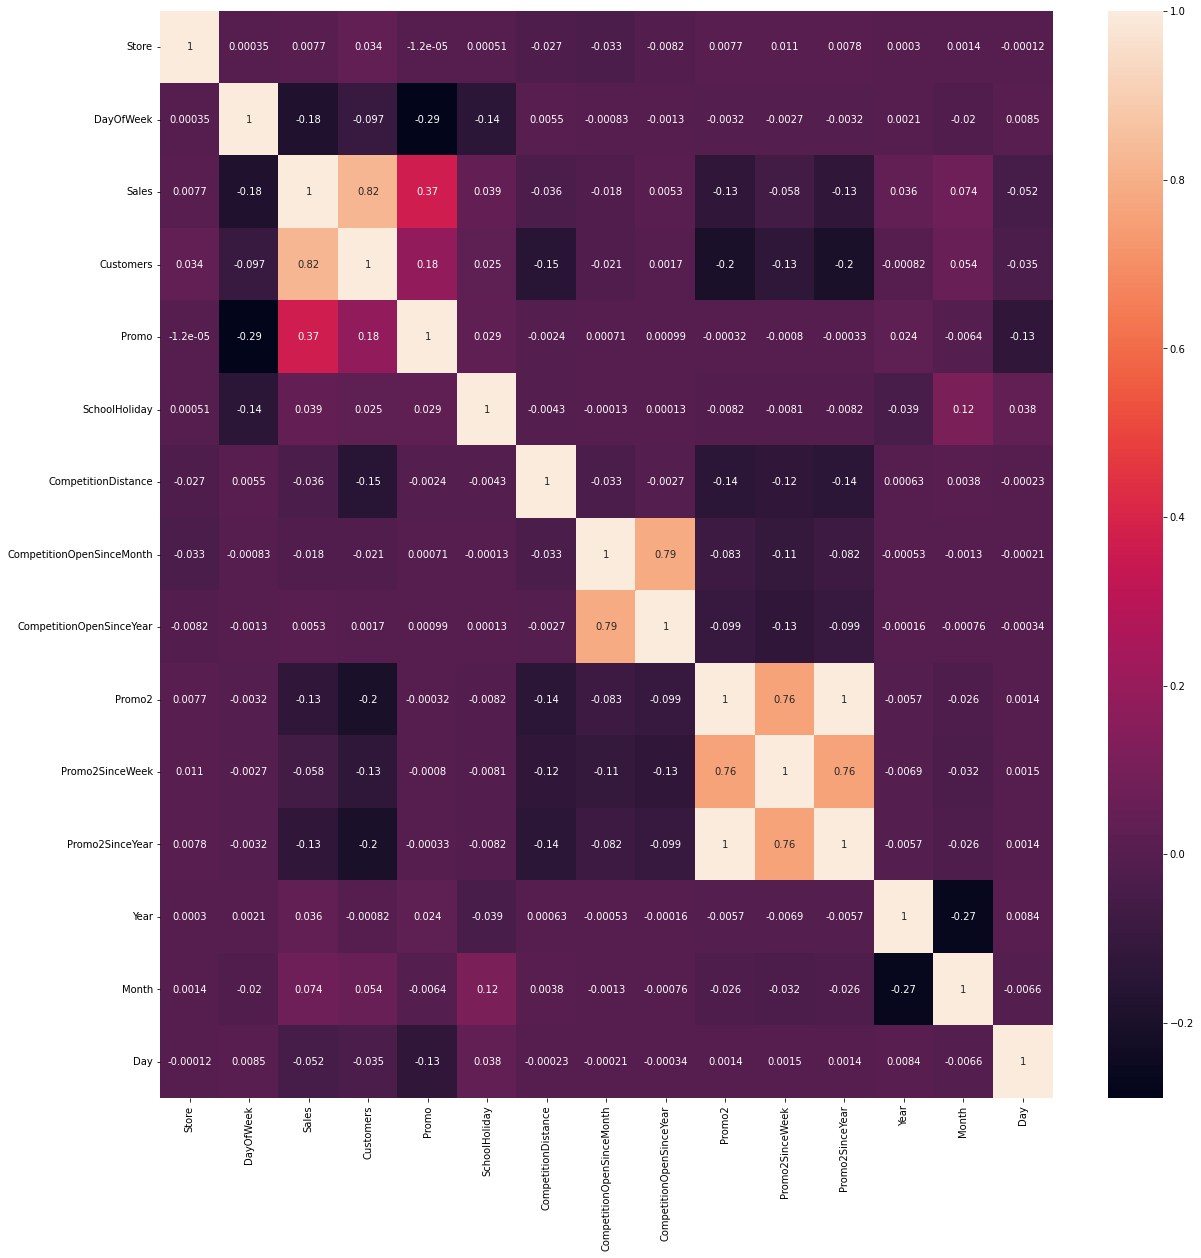

In [131]:
correlations = sales_train_all_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True);

In [111]:
correlations = sales_train_all_df.corr()['Sales'].sort_values()
correlations

DayOfWeek                   -0.178736
Promo2SinceYear             -0.127621
Promo2                      -0.127596
Promo2SinceWeek             -0.058476
CompetitionDistance         -0.036343
CompetitionOpenSinceMonth   -0.018370
CompetitionOpenSinceYear     0.005266
Store                        0.007710
SchoolHoliday                0.038617
Promo                        0.368145
Customers                    0.823597
Sales                        1.000000
Name: Sales, dtype: float64

In [112]:
#Splitting Year, Month and Day in 'Date' column
sales_train_all_df['Year'] = pd.DatetimeIndex(sales_train_all_df['Date']).year
sales_train_all_df['Month'] = pd.DatetimeIndex(sales_train_all_df['Date']).month
sales_train_all_df['Day'] = pd.DatetimeIndex(sales_train_all_df['Date']).day

Text(0.5, 1.0, 'Mean of sales for month')

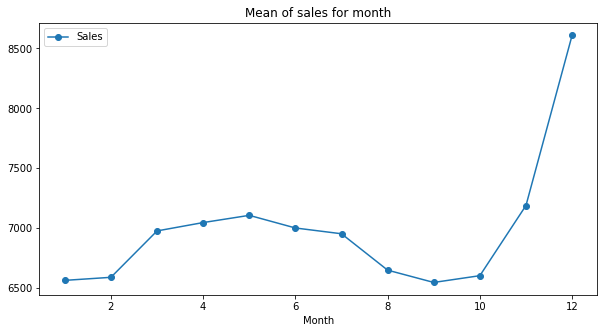

In [134]:
axis = sales_train_all_df.groupby('Month')[['Sales']].mean().plot(figsize=(10,5), marker='o')
axis.set_title('Mean of sales for month')

Text(0.5, 1.0, 'Mean of customers in stores for month')

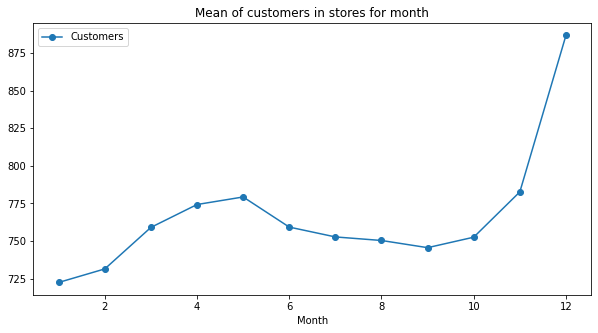

In [135]:
axis = sales_train_all_df.groupby('Month')[['Customers']].mean().plot(figsize=(10,5), marker='o')
axis.set_title('Mean of customers in stores for month')

Text(0.5, 1.0, 'Mean of sales for day')

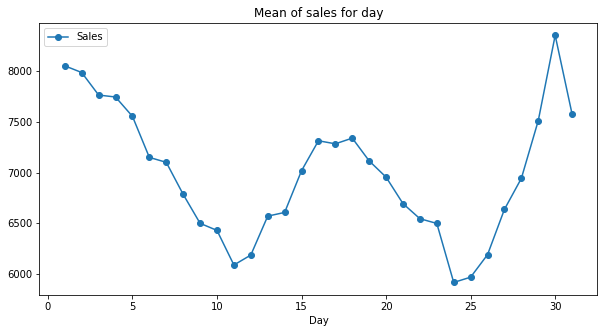

In [136]:
axis = sales_train_all_df.groupby('Day')[['Sales']].mean().plot(figsize=(10,5), marker='o')
axis.set_title('Mean of sales for day')

Text(0.5, 1.0, 'Mean of sales for day of week')

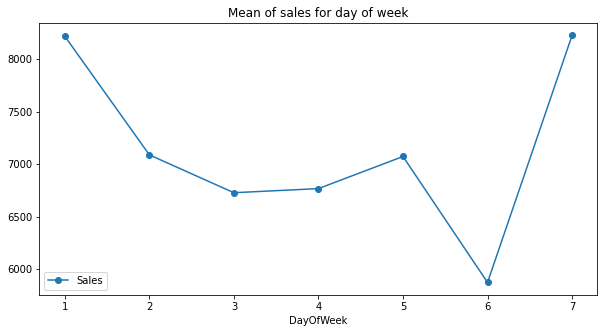

In [137]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Sales']].mean().plot(figsize=(10,5), marker='o')
axis.set_title('Mean of sales for day of week')

Text(0.5, 1.0, 'Mean for day of week')

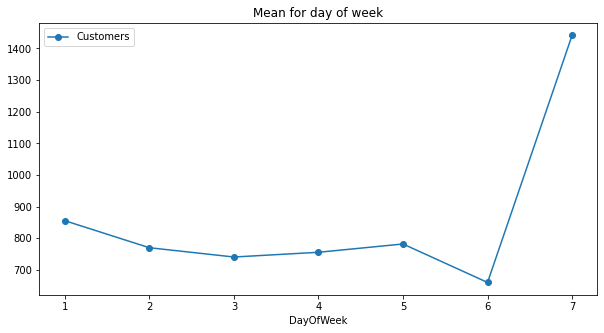

In [117]:
axis = sales_train_all_df.groupby('DayOfWeek')[['Customers']].mean().plot(figsize=(10,5), marker='o')
axis.set_title('Mean of customers in stores for day of week')

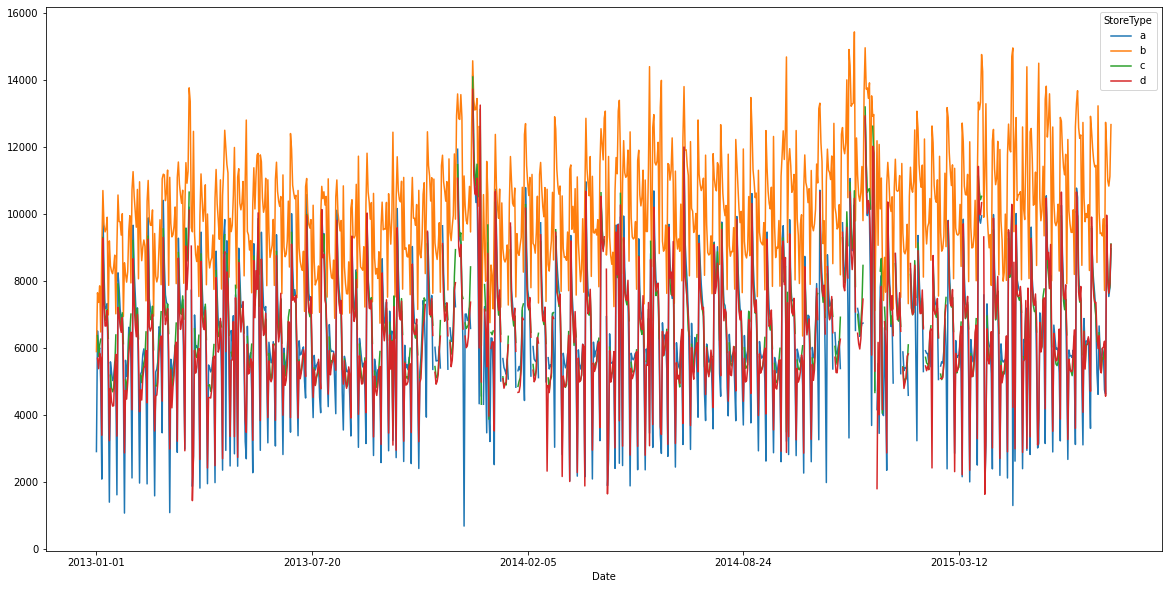

In [118]:
#Analyzing the sales for type of store
fig, ax = plt.subplots(figsize=(20,10))
sales_train_all_df.groupby(['Date', 'StoreType']).mean()['Sales'].unstack().plot(ax = ax)

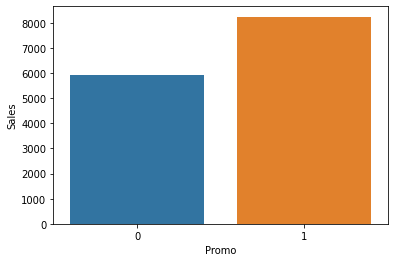

In [119]:
#Checking if promo is effective to incrase the sales
sns.barplot(x = 'Promo', y = 'Sales', data = sales_train_all_df);

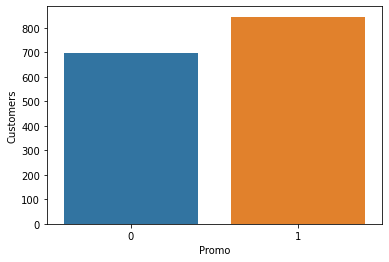

In [120]:
#Checking if promo is effective to incrase number of costumers in stores
sns.barplot(x = 'Promo', y = 'Customers', data = sales_train_all_df);

Task 4 - Predicting sales

In [121]:
!pip install fbprophet

In [122]:
from fbprophet import Prophet

In [123]:
#Creating a function to facebook Prophet
def sales_prediction(store_id, sales_df, periods):
  sales_df = sales_df[sales_df['Store'] == store_id]
  sales_df = sales_df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})
  sales_df = sales_df.sort_values(by = 'ds')

  model = Prophet()
  model.fit(sales_df)
  future = model.make_future_dataframe(periods = periods)
  forecast = model.predict(future)
  figure1 = model.plot(forecast, xlabel = 'Data', ylabel = 'Vendas')
  figure2 = model.plot_components(forecast)

  return sales_df, forecast

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


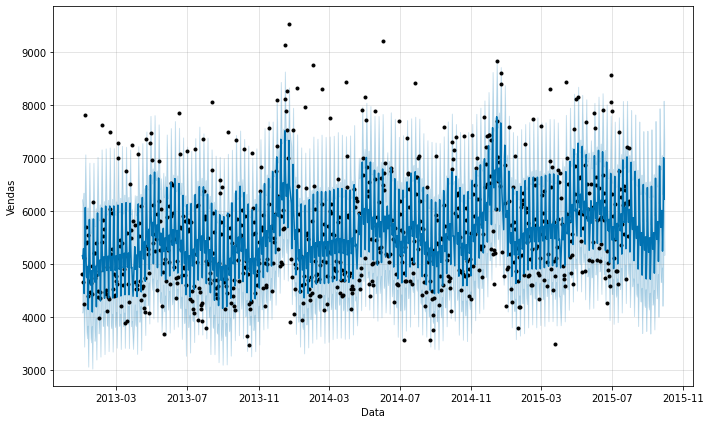

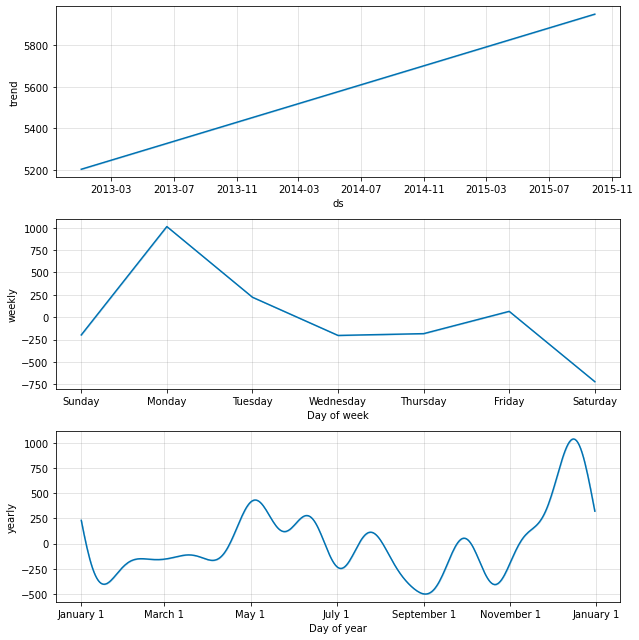

In [124]:
#Running a prediction for next 60 days
df_origin, df_prediction = sales_prediction(10, sales_train_all_df, 60)

In [125]:
df_origin.shape, df_prediction.shape

((784, 2), (844, 19))

In [126]:
df_prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-02,5204.484727,4088.427040,6228.734962,5204.484727,5204.484727,-44.077962,-44.077962,-44.077962,-203.046067,-203.046067,-203.046067,158.968105,158.968105,158.968105,0.0,0.0,0.0,5160.406765
1,2013-01-03,5205.228405,4126.775683,6123.952636,5205.228405,5205.228405,-93.232653,-93.232653,-93.232653,-183.012971,-183.012971,-183.012971,89.780317,89.780317,89.780317,0.0,0.0,0.0,5111.995752
2,2013-01-04,5205.972083,4258.399705,6347.126749,5205.972083,5205.972083,89.471792,89.471792,89.471792,65.942825,65.942825,65.942825,23.528967,23.528967,23.528967,0.0,0.0,0.0,5295.443875
3,2013-01-05,5206.715761,3448.714630,5493.144088,5206.715761,5206.715761,-758.331393,-758.331393,-758.331393,-719.174286,-719.174286,-719.174286,-39.157107,-39.157107,-39.157107,0.0,0.0,0.0,4448.384368
4,2013-01-07,5208.203117,5015.614809,7069.934906,5208.203117,5208.203117,861.318599,861.318599,861.318599,1013.040634,1013.040634,1013.040634,-151.722034,-151.722034,-151.722034,0.0,0.0,0.0,6069.521716


In [127]:
df_prediction.tail(60)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
784,2015-08-01,5904.754320,4194.376519,6252.899701,5904.754320,5904.754320,-673.734983,-673.734983,-673.734983,-719.174286,-719.174286,-719.174286,45.439303,45.439303,45.439303,0.0,0.0,0.0,5231.019337
785,2015-08-02,5905.498641,4609.345627,6845.608633,5905.498641,5905.498641,-172.385687,-172.385687,-172.385687,-197.423916,-197.423916,-197.423916,25.038229,25.038229,25.038229,0.0,0.0,0.0,5733.112954
786,2015-08-03,5906.242962,5866.132219,7903.206079,5906.242962,5906.242962,1015.917486,1015.917486,1015.917486,1013.040634,1013.040634,1013.040634,2.876853,2.876853,2.876853,0.0,0.0,0.0,6922.160448
787,2015-08-04,5906.987283,5032.250803,7226.361607,5906.987283,5906.987283,202.989916,202.989916,202.989916,223.673781,223.673781,223.673781,-20.683865,-20.683865,-20.683865,0.0,0.0,0.0,6109.977199
788,2015-08-05,5907.731604,4584.117223,6594.420650,5907.731604,5907.731604,-248.332224,-248.332224,-248.332224,-203.046067,-203.046067,-203.046067,-45.286157,-45.286157,-45.286157,0.0,0.0,0.0,5659.399381
789,2015-08-06,5908.475925,4623.002985,6675.386822,5908.475925,5908.475925,-253.597221,-253.597221,-253.597221,-183.012971,-183.012971,-183.012971,-70.584250,-70.584250,-70.584250,0.0,0.0,0.0,5654.878705
790,2015-08-07,5909.220246,4735.136073,6953.477691,5909.220246,5909.220246,-30.309420,-30.309420,-30.309420,65.942825,65.942825,65.942825,-96.252245,-96.252245,-96.252245,0.0,0.0,0.0,5878.910826
791,2015-08-08,5909.964567,4023.657930,6071.408414,5909.964567,5909.964569,-841.165148,-841.165148,-841.165148,-719.174286,-719.174286,-719.174286,-121.990862,-121.990862,-121.990862,0.0,0.0,0.0,5068.799419
792,2015-08-09,5910.708888,4528.121487,6577.946014,5910.708886,5910.708897,-344.956807,-344.956807,-344.956807,-197.423916,-197.423916,-197.423916,-147.532891,-147.532891,-147.532891,0.0,0.0,0.0,5565.752082
793,2015-08-10,5911.453209,5621.094285,7821.783606,5911.453199,5911.453234,840.393413,840.393413,840.393413,1013.040634,1013.040634,1013.040634,-172.647221,-172.647221,-172.647221,0.0,0.0,0.0,6751.846622


In [128]:
#Saving a csv file
df_prediction.tail(60).to_csv('prediction_sales.csv')